In [1]:
import matplotlib.pyplot as plt # plots
import cartopy.crs as ccrs      # map projections
import pandas as pd             # large arrays
import numpy as np              # large arrays and matrices
import xarray as xr             # major tool to work with NetCDF data!

In [2]:
from util.functions import area_latlon
from util.functions import create_masks
from util.functions import split_masks
from util.gamap_colormap import WhGrYlRd

# Create masks

In [4]:
# load data
fname = '~/Desktop/co2/data/emission/ODIAC/odiac2019_1x1d_2015.nc'
ds = xr.open_dataset(fname)
#ds

In [5]:
# read in one month of data, [180,360], to create corresponding mask
dr = ds['intl_bunker'][1,:,:]

In [5]:
# available mask types
mask_types = ['giorgi', 'srex', 
              'countries_110', 'countries_50', 
              'us_states_50', 'us_states_10']

In [6]:
# mass produce masks for all mask_types and all regions
for mask_type in mask_types:
# create masks for input file
    mask = create_masks(input_file=dr, 
                    input_file_type='dataarray', 
                    var_name='', 
                    mask_type=mask_type, 
                    output_format='xarray', 
                    output_path='/home/msadiq/Desktop/co2/data/emission/MASKS/nc/' + mask_type, 
                    figure_flag = True, 
                    figure_path='/home/msadiq/Desktop/co2/data/emission/MASKS/figures/' + mask_type)
# Split it into separate mask files and save   
    split_masks(input_file = mask, 
            input_file_type='dataarray',
            output_format='netcdf', 
            output_path='/home/msadiq/Desktop/co2/data/emission/MASKS/nc/' + mask_type, 
            figure_flag = True, 
            figure_path='/home/msadiq/Desktop/co2/data/emission/MASKS/figures/' + mask_type)

finished creating masks for giorgi
finished spliting masks
finished creating masks for srex
finished spliting masks
finished creating masks for countries_110
finished spliting masks
finished creating masks for countries_50
finished spliting masks
finished creating masks for us_states_50
finished spliting masks
finished creating masks for us_states_10
finished spliting masks


In [6]:
# one mask_type for demo
mask_type='giorgi'
mask = create_masks(input_file=dr, 
                    input_file_type='dataarray', 
                    var_name='', 
                    mask_type='giorgi', 
                    output_format='xarray', 
                    output_path='/home/msadiq/Desktop/co2/data/emission/MASKS/nc/' + mask_type, 
                    figure_flag = False, 
                    figure_path='/home/msadiq/Desktop/co2/data/emission/MASKS/figures/' + mask_type)

finished creating masks for giorgi


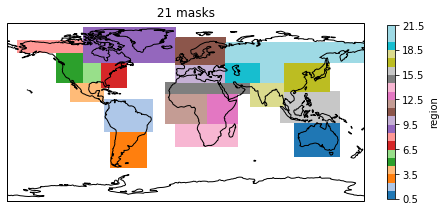

In [7]:
# global map
fig = plt.figure(figsize=[8, 4])
proj=ccrs.PlateCarree()
ax = plt.subplot(111, projection=proj)

low = mask.min()
high = mask.max()
levels = np.arange(low - 0.5, high + 1)

mask.plot(ax=ax, transform=ccrs.PlateCarree(), levels=levels, cmap='tab20', vmax = 21.5, cbar_kwargs={'shrink': 0.8,})
ax.set_title(' ' + str(int(high.values)) + " masks ")
ax.coastlines();

### Split it into separate mask files and save

In [8]:
split_masks(input_file = mask, 
            input_file_type='dataarray',
            output_format='netcdf', 
            output_path='~/Desktop/co2/data/emission/MASKS/nc/giorgi', 
            figure_flag = False, 
            figure_path='~/Desktop/co2/data/emission/MASKS/figures/giorgi')

finished spliting masks
